In [10]:
import os
import json
from pathlib import Path
from collections import defaultdict
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import textwrap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
data_dir = Path('data')

In [12]:
ACTION_TYPES = [
    'List Files',
    'Copy File',
    'Undo Edit Script',
    'Execute Script',
    'Final Answer',
    'Understand File',
    'Inspect Script Lines',
    'Edit Script (AI)'
]

In [13]:
step_action_counts = defaultdict(lambda: {action: 0 for action in ACTION_TYPES})

In [14]:
step_action_counts

defaultdict(<function __main__.<lambda>()>, {})

In [15]:
for trace_file in data_dir.rglob('env_log/trace.json'):
    try:
        with open(trace_file, 'r') as f:
            trace_data = json.load(f)

        for step_num, step in enumerate(trace_data['steps'], 1):
            observation = step['observation']
            action_name = step['action']['name']
            step_action_counts[step_num][action_name] += 1

        
    except json.JSONDecodeError as e:
        print(f"Error reading {trace_file}: {e}")

In [16]:

# def visualize_step_actions(step_action_counts):
#     # Convert the dictionary to a DataFrame for easier manipulation
#     df = pd.DataFrame.from_dict(step_action_counts, orient='index')
    
#     # Sort by step number
#     df = df.sort_index()
    
#     # Get action types
#     action_types = df.columns
    
#     # Set up the plot
#     fig, ax = plt.subplots(figsize=(14, 8))
    
#     # Define a color map for actions
#     colors = {
#         'List Files': '#4682B4',          # Steel Blue
#         'Copy File': '#DAA520',           # Goldenrod
#         'Undo Edit Script': '#808080',    # Gray
#         'Execute Script': '#228B22',      # Forest Green
#         'Final Answer': '#FFD700',        # Gold
#         'Understand File': '#CD5C5C',     # Indian Red
#         'Inspect Script Lines': '#87CEEB', # Sky Blue
#         'Edit Script (AI)': '#8B008B'     # Dark Magenta
#     }
    
#     # Plot stacked bars
#     bottom = np.zeros(len(df))
#     for action in action_types:
#         ax.bar(df.index, df[action], bottom=bottom, label=action, color=colors.get(action))
#         bottom += df[action].values
    
#     # Add labels and title
#     ax.set_xlabel('Step Number', fontsize=12)
#     ax.set_ylabel('Count', fontsize=12)
#     ax.set_title('Action Distribution for Each Step', fontsize=14)
    
#     # Add gridlines
#     ax.grid(axis='y', linestyle='--', alpha=0.7)
    
#     # Add legend
#     ax.legend(title='Actions', bbox_to_anchor=(1.05, 1), loc='upper left')
    
#     # Adjust layout
#     plt.tight_layout()
    
#     # Add figure caption
#     plt.figtext(0.5, 0.01, 'Figure 8: Action distribution for each step.', 
#                 ha='center', fontsize=10)
    
#     return fig

# # Example usage
# # visualize_step_actions(step_action_counts)
# # plt.savefig('action_distribution.png', dpi=300, bbox_inches='tight')
# # plt.show()

In [17]:
def visualize_step_actions(step_action_counts):
    # Convert the dictionary to a DataFrame for easier manipulation
    df = pd.DataFrame.from_dict(step_action_counts, orient='index')
    
    # Sort by step number
    df = df.sort_index()
    
    # Apply rolling mean to smooth the data
    window_size = 2  # Adjust this value to control smoothing amount
    df_smooth = df.rolling(window=window_size, min_periods=1, center=True).mean()
    
    # Set up the plot with increased size
    fig, ax = plt.subplots(figsize=(16, 10))  # Increased size to accommodate legend
    
    # Define a color palette (keeping the original colors)
    colors = {
        'List Files': '#4169E1',          # Royal Blue
        'Copy File': '#98FB98',           # Pale Green
        'Undo Edit Script': '#DEB887',    # Burlywood
        'Execute Script': '#20B2AA',       # Light Sea Green
        'Final Answer': '#9370DB',        # Medium Purple
        'Understand File': '#CD853F',     # Peru
        'Inspect Script Lines': '#FA8072', # Salmon
        'Edit Script (AI)': '#6495ED'     # Cornflower Blue
    }
    
    # Create stacked area plot with smoothed data
    ax.stackplot(df_smooth.index, 
                [df_smooth[col] for col in ACTION_TYPES],
                labels=ACTION_TYPES,
                colors=[colors[action] for action in ACTION_TYPES])
    
    # Add labels and title
    ax.set_xlabel('Step Number', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title('Action Distribution Across Steps', fontsize=14)
    
    # Set y-axis ticks with jumps of 8
    y_max = max(df_smooth.sum(axis=1))
    y_ticks = np.arange(0, y_max + 8, 8)
    ax.set_yticks(y_ticks)
    
    # Add gridlines
    ax.grid(True, ls="-", alpha=0.2)
    
    # Add legend inside the plot
    ax.legend(title='Actions', loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

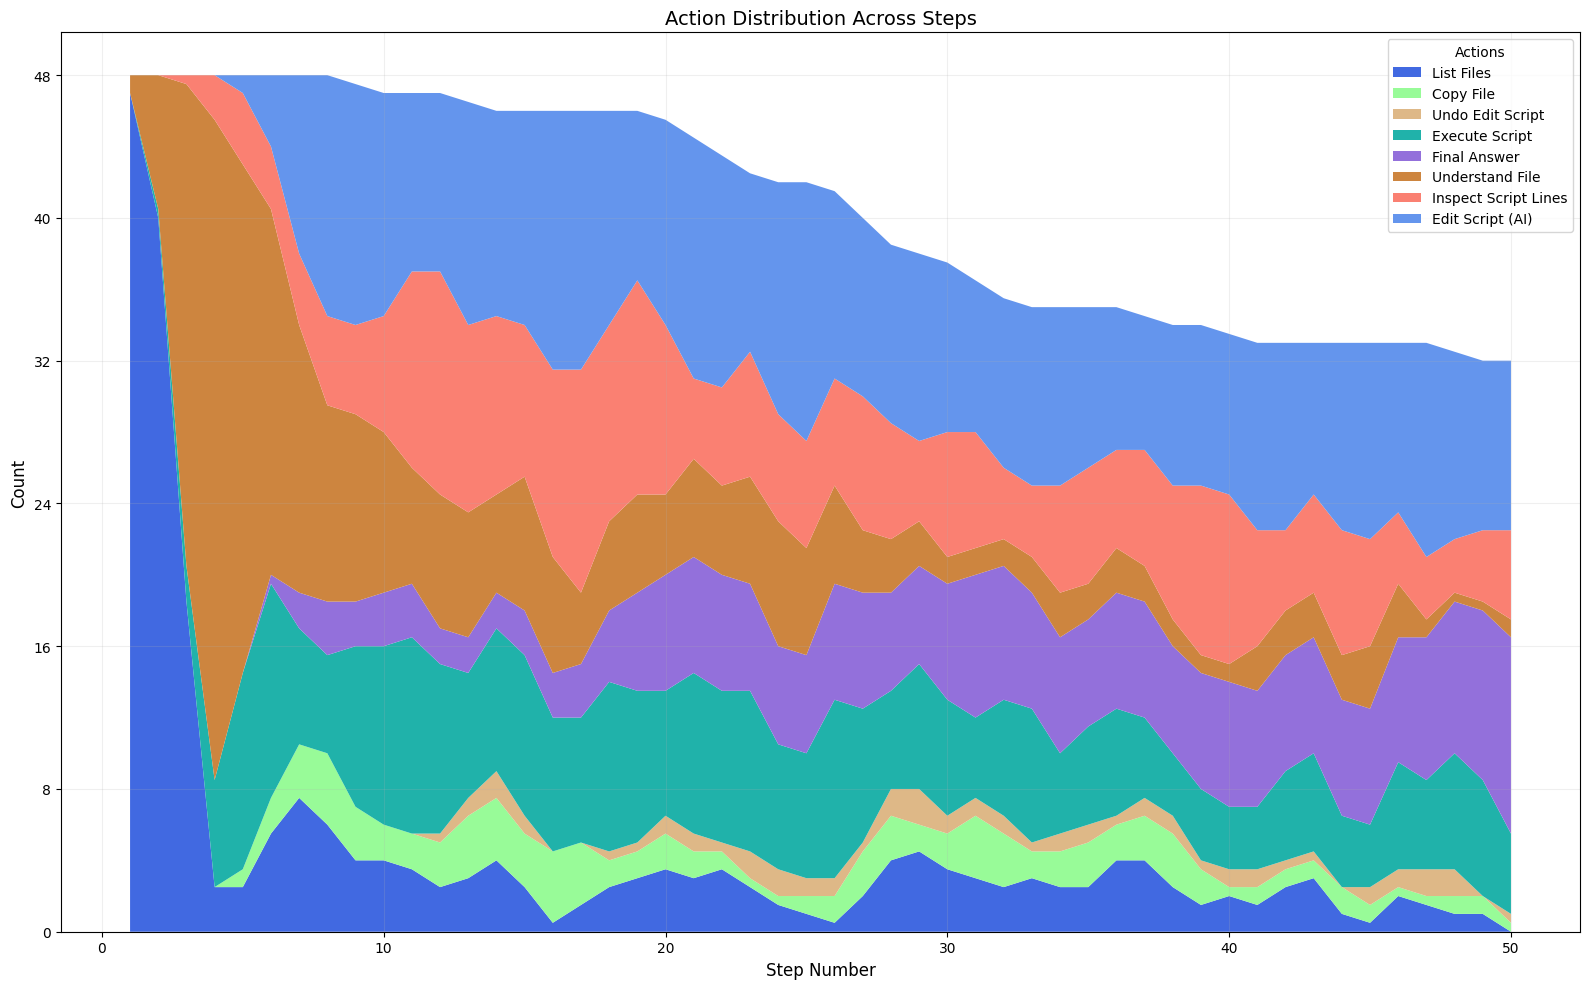

In [18]:
os.makedirs('Action_per_step', exist_ok=True)
fig = visualize_step_actions(step_action_counts)
fig.savefig('Action_per_step/action_distribution.pdf', dpi=300, bbox_inches='tight')